In [77]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [78]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

In [79]:
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)# remove special characters
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()# remove 1 letter words
sentences = sentences.lower()# remove 1 letter words

In [80]:
sentences

'we are about to study the idea of computational process computational processes are abstract beings that inhabit computers as they evolve processes manipulate other abstract things called data the evolution of process is directed by pattern of rules called program people create programs to direct processes in effect we conjure the spirits of the computer with our spells'

In [106]:
words = sentences.split()
vocab = set(words)

In [107]:
words

['we',
 'are',
 'about',
 'to',
 'study',
 'the',
 'idea',
 'of',
 'computational',
 'process',
 'computational',
 'processes',
 'are',
 'abstract',
 'beings',
 'that',
 'inhabit',
 'computers',
 'as',
 'they',
 'evolve',
 'processes',
 'manipulate',
 'other',
 'abstract',
 'things',
 'called',
 'data',
 'the',
 'evolution',
 'of',
 'process',
 'is',
 'directed',
 'by',
 'pattern',
 'of',
 'rules',
 'called',
 'program',
 'people',
 'create',
 'programs',
 'to',
 'direct',
 'processes',
 'in',
 'effect',
 'we',
 'conjure',
 'the',
 'spirits',
 'of',
 'the',
 'computer',
 'with',
 'our',
 'spells']

In [108]:
vocab

{'about',
 'abstract',
 'are',
 'as',
 'beings',
 'by',
 'called',
 'computational',
 'computer',
 'computers',
 'conjure',
 'create',
 'data',
 'direct',
 'directed',
 'effect',
 'evolution',
 'evolve',
 'idea',
 'in',
 'inhabit',
 'is',
 'manipulate',
 'of',
 'other',
 'our',
 'pattern',
 'people',
 'process',
 'processes',
 'program',
 'programs',
 'rules',
 'spells',
 'spirits',
 'study',
 'that',
 'the',
 'they',
 'things',
 'to',
 'we',
 'with'}

In [109]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [110]:
vocab_size

43

In [111]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [112]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [113]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [114]:
embeddings

array([[0.06205155, 0.49688468, 0.79741026, 0.68506937, 0.45777852,
        0.70127768, 0.88262898, 0.70309958, 0.6259749 , 0.17504936],
       [0.13940575, 0.24462548, 0.77852331, 0.3231893 , 0.62906913,
        0.84549094, 0.40277984, 0.38148606, 0.32016106, 0.80770175],
       [0.85461081, 0.35463221, 0.01112265, 0.68850811, 0.11313403,
        0.67216707, 0.52424837, 0.65169668, 0.59674928, 0.06976897],
       [0.29863292, 0.58544722, 0.63883507, 0.48119249, 0.73098671,
        0.47880766, 0.58826894, 0.42218983, 0.244677  , 0.1899684 ],
       [0.42681863, 0.99761295, 0.11152266, 0.72338596, 0.08823939,
        0.88815795, 0.0458523 , 0.40937124, 0.56948606, 0.33427282],
       [0.94007038, 0.76172317, 0.57037882, 0.16815608, 0.56683513,
        0.63661262, 0.28550274, 0.49502925, 0.67733992, 0.03644323],
       [0.35737313, 0.6648072 , 0.40207145, 0.93553575, 0.8798665 ,
        0.25519896, 0.2498735 , 0.81044154, 0.78400193, 0.72050259],
       [0.77669673, 0.57622888, 0.1564159

In [115]:
embeddings.shape

(43, 10)

In [116]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [92]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [117]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [118]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [119]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [120]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [121]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [122]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [123]:
theta

array([[ 0.22677886,  0.97765706,  0.78514917, ...,  0.03526527,
        -0.92095592, -0.91036183],
       [ 0.92447535,  0.05839718, -0.35923111, ..., -0.22630247,
         0.10460217,  0.51310983],
       [ 0.71111881, -0.04769929,  0.51773245, ..., -0.3052586 ,
         0.83675259,  0.34621926],
       ...,
       [ 0.94493395, -0.58997002,  0.04109602, ...,  0.12423075,
         0.52498502,  0.15612938],
       [ 0.26545326, -0.53838806, -0.23866347, ...,  0.55367566,
        -0.99767964,  0.33721488],
       [ 0.27130874, -0.82934591, -0.11882212, ...,  0.54450162,
        -0.05259757, -0.11846196]])

In [124]:

theta.shape

(40, 43)

In [126]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)


    epoch_losses[epoch] = losses

In [127]:
losses

[0.5051718478217866,
 0.3431650713797721,
 0.2880696826525402,
 0.16311747690096626,
 0.46605422431009075,
 0.15886988284139772,
 0.38954398045265365,
 0.40330226155467636,
 0.5761592679889195,
 0.16721182655553557,
 0.33338084595384304,
 0.6134411588701378,
 0.39299273884609326,
 0.5504698386966137,
 0.8276501084855051,
 0.38265091380582295,
 0.5061676570430538,
 0.46107636651314293,
 0.49503253474680936,
 0.5319346818230865,
 0.3755263280915286,
 0.31532010308581643,
 0.3060973946991242,
 0.4286174983940451,
 0.22254147046730366,
 0.3181737902531576,
 0.1857181412500681,
 0.6072007576470669,
 0.13998841228899975,
 0.3516724240272538,
 0.4550107890727566,
 0.27083791520970363,
 0.26962436667986966,
 0.4316921288573981,
 0.30981970092969974,
 0.3455219154739109,
 0.28947485689738206,
 0.490013636434695,
 0.34921213348012276,
 0.3749388879172353,
 0.3562152435600424,
 0.2798110664600371,
 0.35445258771897065,
 0.4440764155276112,
 0.5575648074784004,
 0.6888319338700631,
 0.599505186574

Text(0, 0.5, 'Losses')

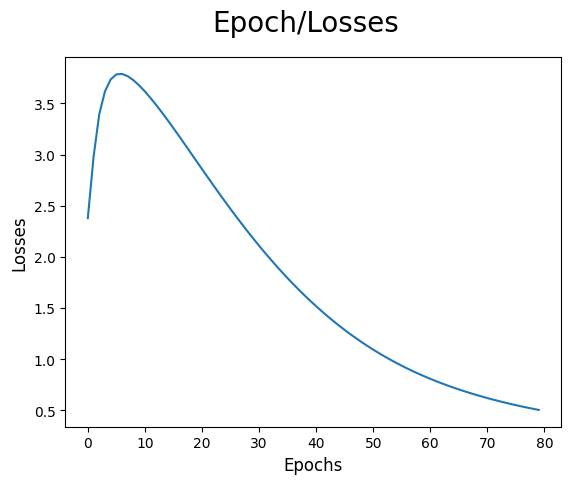

In [128]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [129]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word

In [130]:
predict(['we', 'are', 'to', 'study'])

'about'

In [131]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))

In [132]:
accuracy()

1.0